# Poison dart frogs

Can you estimate how toxic a poison dart frog is based on its brightness?

Poison dart frogs are small, colorful frogs from Central and South America. They're famous for their toxic skin, which some indigenous people use for blow darts.

Scientists studied the connection between the bright colors and toxicity of the poison dart frog **Dendrobates pumilio**. While they're usually red with blue legs, they can be found in about 15 different colors in Panama.

The file `frog-reflectance.csv` contains the average brightness (from 0 to 1) of 10 frog populations, measured on both the back and belly.

The file `frog-toxicity.csv` provides a `toxicity` score (from 0 to 1) for 48 frogs from the same 10 populations. Toxicity was tested by injecting frog skin extracts into mice and recording how long it took them to fall back asleep. Longer times suggest higher `toxicity`.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from linear_model import LinearModel

df = pd.read_csv('frog-reflectance.csv')
df.head()

,pop_id,back_brightness,belly_brightness
0,AG,0.43,0.46
1,AL,0.64,0.42
2,BCG,1.00,0.95
3,BCO,0.82,1.00
4,CA,0.46,0.51


In [2]:
tox = pd.read_csv('frog-toxicity.csv')
tox.head()

,pop_id,frog_id,toxicity
0,BCO,BC167,0.886925
1,BCO,BC166,0.803917
2,BCO,BC171,0.625008
3,BCO,BC169,0.975847
4,BCO,BC165,0.774033


# Project Ideas

- Build two linear models:
	- Model 1: `toxicity` (x-axis) vs. `back_brightness`
	
	- Model 2: `toxicity` vs. `belly_brightness`

- To create the models, first calculate the average `toxicity` for each `pop_id`, then merge these values into the main dataframe (`df`).

- Visualize the data by creating scatter plots with best-fit lines for both models.

- Compare the goodness of fit between back and belly brightness and explore possible biological explanations for any differences in correlation.


LinearModel():
Slope: 0.5758129980180037
Intercept: 0.31650432540097156
R-squared: 0.6067780219154058
LinearModel():
Slope: 0.34762229493312435
Intercept: 0.39368488611271557
R-squared: 0.18431612963411392


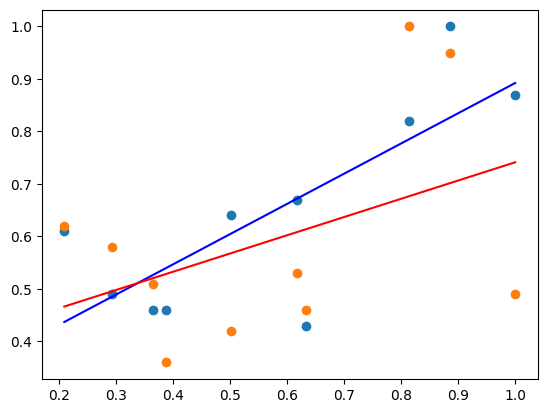

In [ ]:
# Average toxicity for pop-id
toxavg = pd.DataFrame()
toxavg['toxicity'] = tox.groupby('pop_id')['toxicity'].mean()
toxavg = toxavg.reset_index()

# Merge the two dataframes
# df = df.merge(toxavg, on='pop_id').reset_index().drop(columns='index') # In comment, not to merge again

# Model 1
model1 = LinearModel()
model1.fit(df['toxicity'], df['back_brightness'])
plt.scatter(df['toxicity'], df['back_brightness'])
model1.plot_model(df['toxicity'].min(), df['toxicity'].max(), color='blue')
model1.print_model_info()

# Model 2
model2 = LinearModel()
model2.fit(df['toxicity'], df['belly_brightness'])
plt.scatter(df['toxicity'], df['belly_brightness'])
model2.plot_model(df['toxicity'].min(), df['toxicity'].max(), color='red')
model2.print_model_info()
